In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, fftshift

#### Vamos gerar diferentes sonoides do tipo:

$$A(t) = A_0 \cos(\omega t)$$

lembrado que a frequência ângular é dada por $\omega = 2\pi f$.

In [2]:
#Tempo de duração do sinal
t = np.arange(-0.128,0.128+0.001,0.001) #taxa de amostragem em ms

In [12]:
#Definindo diferentes frequências para gerar as senoides
f = np.arange(10,130,20)
w = 2*np.pi*f

In [13]:
#Adicionando as senoides em uma lista
signal = {}
for i in f:
    signal[str(i)+' hz'] = np.cos(2*np.pi*i*(t))

In [15]:
#Criando uma senoide a partir do somatório de todas as anteriores
signal_sum = np.zeros(len(t))
for i in signal.keys():
    signal_sum += signal[i]
signal['signal_sum'] = signal_sum

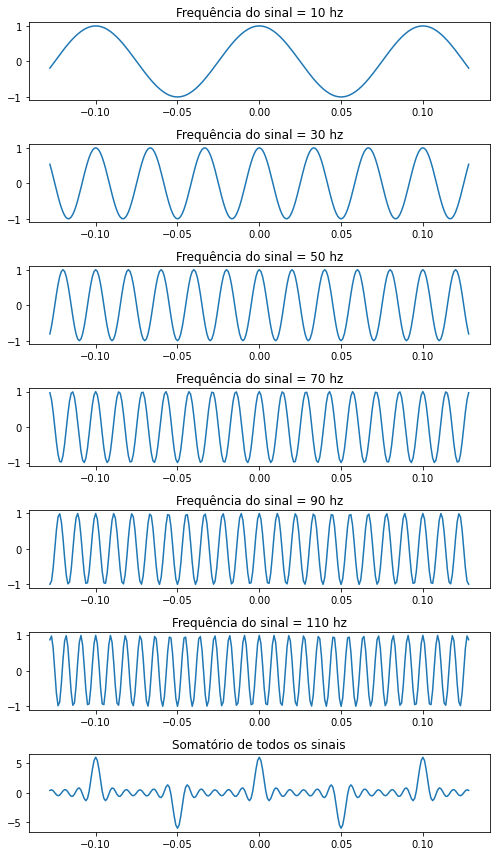

In [28]:
fig, axes = plt.subplots(nrows=len(signal),figsize=(7,12))

for i in range(0,len(signal)):
    axes[i].plot(t,signal[list(signal.keys())[i]])
    axes[i].set_title('Frequência do sinal = '+list(signal.keys())[i])
    
axes[-1].set_title('Somatório de todos os sinais')

fig.tight_layout()

[]

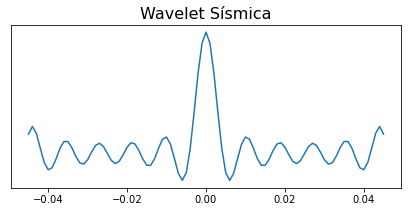

In [29]:
fig, axes = plt.subplots(figsize=(7,3))

axes.plot(t[83:174],signal['signal_sum'][83:174])

axes.set_title('Wavelet Sísmica',fontsize=16)

axes.set_yticks([])

#### Vamos plotar o espectro de frequência de cada senoide

In [30]:
N = len(t) # Número de amostras
dt = 0.001 # Taxa de amostragem em segundos
f_max = 1/(2*dt) # Frequência Nyquist

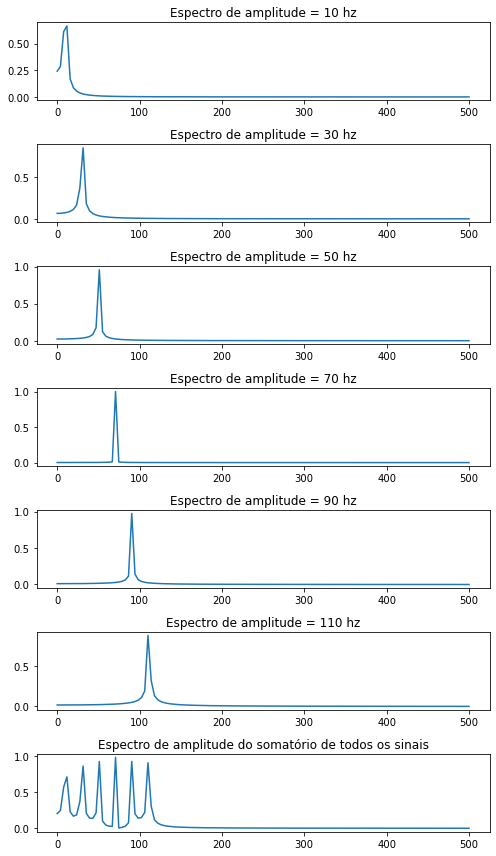

In [32]:
fig, axes = plt.subplots(nrows=len(signal),figsize=(7,12))

for i in range(0,len(signal)):
    
    yf = fft(signal[list(signal.keys())[i]])
    xf = np.linspace(0,f_max,N//2)
    
    axes[i].plot(xf,2.0/N * np.abs(yf[0:N//2]))
    axes[i].set_title('Espectro de amplitude = ' + list(signal.keys())[i])

axes[-1].set_title('Espectro de amplitude do somatório de todos os sinais')
    
fig.tight_layout()

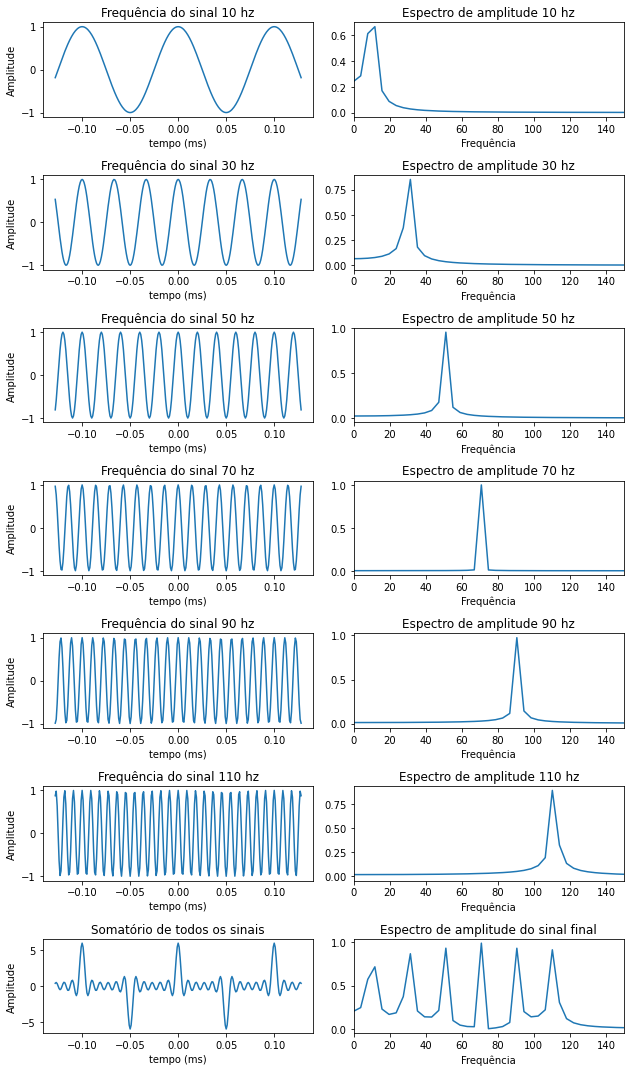

In [33]:
fig, axes = plt.subplots(nrows=len(signal),ncols=2,figsize=(9,15))

for i in range(0,len(signal)):
    
    axes[i][0].plot(t,signal[list(signal.keys())[i]])
    axes[i][0].set_title('Frequência do sinal '+list(signal.keys())[i])
    axes[i][0].set_xlabel('tempo (ms)')
    axes[i][0].set_ylabel('Amplitude')
    
    yf = fft(signal[list(signal.keys())[i]])
    xf = np.linspace(0,f_max,N//2)
    
    axes[i][1].plot(xf,2.0/N * np.abs(yf[0:N//2]))
    axes[i][1].set_title('Espectro de amplitude ' + list(signal.keys())[i])
    axes[i][1].set_xlabel('Frequência')
    
    axes[i][1].set_xlim(0,150)

axes[-1][0].set_title('Somatório de todos os sinais')
axes[-1][0].set_xlabel('tempo (ms)')
axes[-1][0].set_ylabel('Amplitude')

axes[-1][1].set_title('Espectro de amplitude do sinal final')
axes[-1][1].set_xlabel('Frequência')

axes[-1][1].set_xlim(0,150)

fig.tight_layout()